# Setup

In [1]:
# import packages
%run ../global_packages.py

# get the global parameters
%run ../global_pars.py

# import your local functions
sys.path.insert(1, '../')
from global_functions import *

# make sure the figures plot inline rather than at the end
%matplotlib inline

# Paths and Parameters

In [2]:
figpath = '../figures/'

# Get Data

In [3]:
ds_CHL = xr.open_dataset('../data_processing/4_CHL/chl_processed.nc')
ds_CHL

<xarray.Dataset>
Dimensions:           (lat: 828, lon: 1296, month: 12, time: 273)
Coordinates:
  * lon               (lon) float64 48.52 48.56 48.6 48.65 ... 102.4 102.4 102.5
  * lat               (lat) float64 -1.479 -1.438 -1.396 ... 32.9 32.94 32.98
  * time              (time) datetime64[ns] 1997-09-04 1997-10-01 ... 2020-05-01
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mon_chl           (time, lat, lon) float64 ...
    mon_chl_mon_clim  (month, lat, lon) float64 ...
    mon_chl_mon_anom  (time, lat, lon) float64 ...

In [4]:
ds_CHL_SLA = xr.open_dataset('../data_processing/6_Regridding/chl_to_sla.nc')
ds_CHL_SLA

<xarray.Dataset>
Dimensions:           (lat: 138, lon: 216, month: 12, time: 273)
Coordinates:
  * time              (time) datetime64[ns] 1997-09-04 1997-10-01 ... 2020-05-01
  * lon               (lon) float64 48.62 48.88 49.12 ... 101.9 102.1 102.4
  * lat               (lat) float64 -1.375 -1.125 -0.875 ... 32.38 32.62 32.88
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mon_chl_mon_anom  (time, lat, lon) float64 ...
    mon_chl_mon_clim  (month, lat, lon) float64 ...

In [5]:
ds_SLA = xr.open_dataset('../data_processing/2_SLA/sla_processed.nc')
ds_SLA

<xarray.Dataset>
Dimensions:           (day_time: 10013, lat: 138, loc_list: 6, lon: 216, month: 12, no_stations: 505, time: 329)
Coordinates:
  * lon               (lon) float64 48.62 48.88 49.12 ... 101.9 102.1 102.4
  * lat               (lat) float64 -1.375 -1.125 -0.875 ... 32.38 32.62 32.88
  * time              (time) datetime64[ns] 1993-01-01 1993-02-01 ... 2020-05-01
  * day_time          (day_time) datetime64[ns] 1993-01-01 ... 2020-05-31
  * month             (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * no_stations       (no_stations) float64 1.0 2.0 3.0 ... 503.0 504.0 505.0
  * loc_list          (loc_list) int64 0 75 225 294 415 504
Data variables:
    daily_sla         (day_time, lat, lon) float64 ...
    mon_sla           (time, lat, lon) float64 ...
    mon_sla_mon_clim  (month, lat, lon) float64 ...
    mon_sla_mon_anom  (time, lat, lon) float64 ...
    sta_loninds       (no_stations) int64 ...
    sta_latinds       (no_stations) int64 ...
    sta_lon           (no_sta

In [6]:
# load DMI data
ds_DMI= xr.open_dataset('../data_processing/3_DMI/dmi_processed.nc')
posIODyears = list(np.array(ds_DMI.pos_IOD_years))
negIODyears = list(np.array(ds_DMI.neg_IOD_years))
neuIODyears = list(np.array(ds_DMI.neu_IOD_years))

sposIODyears = list(np.array(ds_DMI.spos_IOD_years)) 
snegIODyears = list(np.array(ds_DMI.sneg_IOD_years)) 

wposIODyears = list(np.array(ds_DMI.wpos_IOD_years)) 
wnegIODyears = list(np.array(ds_DMI.wneg_IOD_years)) 

ds_DMI

<xarray.Dataset>
Dimensions:          (negyears: 10, neuyears: 40, posyears: 13, snegyears: 6, sposyears: 6, time: 747, wnegyears: 4, wposyears: 7)
Coordinates:
  * time             (time) datetime64[ns] 1958-03-01 1958-04-01 ... 2020-05-01
  * posyears         (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
  * negyears         (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
  * neuyears         (neuyears) int64 1958 1959 1962 1965 ... 2014 2017 2020
  * sposyears        (sposyears) int64 1961 1972 1994 1997 2006 2019
  * snegyears        (snegyears) int64 1960 1964 1970 1996 1998 2016
  * wposyears        (wposyears) int64 1963 1967 1977 1982 2012 2015 2018
  * wnegyears        (wnegyears) int64 1971 1975 1992 2010
Data variables:
    dmi              (time) float64 ...
    dmi_3mo_runmean  (time) float64 ...
    pos_IOD_years    (posyears) int64 1961 1963 1967 1972 ... 2015 2018 2019
    neg_IOD_years    (negyears) int64 1960 1964 1970 1971 ... 1998 2010 2016
    neu

In [7]:
xx,yy = np.meshgrid(np.array(ds_CHL.lon),np.array(ds_CHL.lat))
xx = xx.flatten()
yy = yy.flatten()

In [8]:
std_anom = np.array(ds_CHL.mon_chl_mon_anom.std(dim = 'time'))

std_clim = np.array(ds_CHL.mon_chl_mon_clim.std(dim = 'month'))

# Subset and SLA to CHL years 1997+ and by season

In [9]:
# get new monthly climatology and anomalies with data only from 1997-2020
time_slice = slice('1997-09-01','2020-05-01')
ds_SLA = ds_SLA.sel(time = time_slice)
ds_SLA = ds_SLA.sel(day_time = time_slice)


# monthly clim
mon_sla_mon_clim= mon_clim = ds_SLA.daily_sla.groupby('day_time.month').mean('day_time')

# monthly anom = monthly avg data - monthly climatology
mon_sla_mon_anom = ds_SLA.mon_sla.groupby('time.month') - mon_sla_mon_clim
# ds_SLA

/home/jennap/anaconda3/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


# CHL vs SLA interannual

In [11]:
season = np.ones(ds_SLA.time.shape)
for tt in range(ds_SLA.time.shape[0]):
    mm = ds_SLA.time.dt.month[tt]
    if (mm == 12) | (mm == 1) | (mm == 2) | (mm == 3) | (mm == 4) | (mm == 5):
        season[tt] = 0  

In [12]:
n = len(ds_CHL_SLA.mon_chl_mon_anom.lat)
m = len(ds_CHL_SLA.mon_chl_mon_anom.lon)
    
SLOPE_sla_ia = np.full([n,m,2],np.nan)
INTERCEPT_sla_ia = np.full([n,m,2],np.nan)
R_VALUE_sla_ia = np.full([n,m,2],np.nan)
P_VALUE_sla_ia = np.full([n,m,2],np.nan)
STD_ERR_sla_ia = np.full([n,m,2],np.nan)

for ss in range(2):
    with tqdm(total=n * m) as pbar:
        for ii,jj in itertools.product(np.arange(n),np.arange(m)):
            tempvar1 = np.array(ds_CHL_SLA.mon_chl_mon_anom[:,ii,jj])
            tempvar2 = np.array(mon_sla_mon_anom[:,ii,jj])
            
            #subset for season
            ind = (season == ss)
            tempvar1 = tempvar1[ind]
            tempvar2 = tempvar2[ind]
            
            #subset for season
            

            nanmask = np.isnan(tempvar1) | np.isnan(tempvar2)

            if tempvar1[~nanmask].size >2:
                slope, intercept, _, _, std_err=stats.linregress(tempvar1[~nanmask],tempvar2[~nanmask])
                r_value,p_value = stats.pearsonr(tempvar1[~nanmask],tempvar2[~nanmask])
                SLOPE_sla_ia[ii,jj,ss] = slope
                INTERCEPT_sla_ia[ii,jj,ss] = intercept
                R_VALUE_sla_ia[ii,jj,ss] = r_value
                P_VALUE_sla_ia[ii,jj,ss] = p_value
                STD_ERR_sla_ia[ii,jj,ss] = std_err

            pbar.update(1)

100%|██████████| 29808/29808 [02:10<00:00, 228.45it/s]


# CHL vs SLA Seasonal

In [13]:
season = np.ones(ds_SLA.month.shape)
for tt in range(ds_SLA.month.shape[0]):
    mm = ds_SLA.month[tt]
    if (mm == 12) | (mm == 1) | (mm == 2) | (mm == 3) | (mm == 4) | (mm == 5):
        season[tt] = 0 

In [14]:
n = len(ds_CHL_SLA.mon_chl_mon_clim.lat)
m = len(ds_CHL_SLA.mon_chl_mon_clim.lon)
    
SLOPE_sla = np.full([n,m,2],np.nan)
INTERCEPT_sla = np.full([n,m,2],np.nan)
R_VALUE_sla = np.full([n,m,2],np.nan)
P_VALUE_sla = np.full([n,m,2],np.nan)
STD_ERR_sla = np.full([n,m,2],np.nan)

for ss in range(2):
    with tqdm(total=n * m) as pbar:
        for ii,jj in itertools.product(np.arange(n),np.arange(m)):
            tempvar1 = np.array(ds_CHL_SLA.mon_chl_mon_clim[:,ii,jj])
            tempvar2 = np.array(mon_sla_mon_clim[:,ii,jj])
            
            #subset for season
            ind = (season == ss)
            tempvar1 = tempvar1[ind]
            tempvar2 = tempvar2[ind]
            
            #subset for season
            

            nanmask = np.isnan(tempvar1) | np.isnan(tempvar2)

            if tempvar1[~nanmask].size >2:
                slope, intercept, _, _, std_err=stats.linregress(tempvar1[~nanmask],tempvar2[~nanmask])
                r_value,p_value = stats.pearsonr(tempvar1[~nanmask],tempvar2[~nanmask])
                SLOPE_sla[ii,jj,ss] = slope
                INTERCEPT_sla[ii,jj,ss] = intercept
                R_VALUE_sla[ii,jj,ss] = r_value
                P_VALUE_sla[ii,jj,ss] = p_value
                STD_ERR_sla[ii,jj,ss] = std_err

            pbar.update(1)

100%|██████████| 29808/29808 [00:46<00:00, 644.25it/s]


In [15]:
ds_ro = xr.open_dataset('..//data_processing/1_WOD_Coastal/Laruelle_2017_coastal_ocean_mask.nc')
maskw_ro = ds_ro.mask_coastal2
# total
lat_bounds = [-1.5, 33]
lon_bounds = [48.5, 102.5]

lat_slice = slice(lat_bounds[0], lat_bounds[1])
lon_slice = slice(lon_bounds[0], lon_bounds[1])

#subset gridded data
maskw_ro = maskw_ro.sel(latitude = lat_slice, longitude = lon_slice)

lat_ro = np.array(maskw_ro.latitude)
lon_ro = np.array(maskw_ro.longitude)
maskw_ro = np.array(maskw_ro).astype(int).T
xx_ro,yy_ro = np.meshgrid(lon_ro,lat_ro)

# remove nicobar islands
maskw_ro = np.where(~((yy_ro>7) & (yy_ro<13.75) & (xx_ro>92) & (xx_ro<94)),maskw_ro,False)

xx,yy = np.meshgrid(np.array(ds_CHL.lon),np.array(ds_CHL.lat))
inlat = yy.flatten()
inlon = xx.flatten()

mask= mask_coast(inlat,inlon,maskw_ro,lat_ro,lon_ro)

xx,yy = np.meshgrid(np.array(ds_CHL_SLA.lon),np.array(ds_CHL_SLA.lat))
inlat = yy.flatten()
inlon = xx.flatten()

mask_sla= mask_coast(inlat,inlon,maskw_ro,lat_ro,lon_ro)

# Plot

/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in less_equal
/home/jennap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher

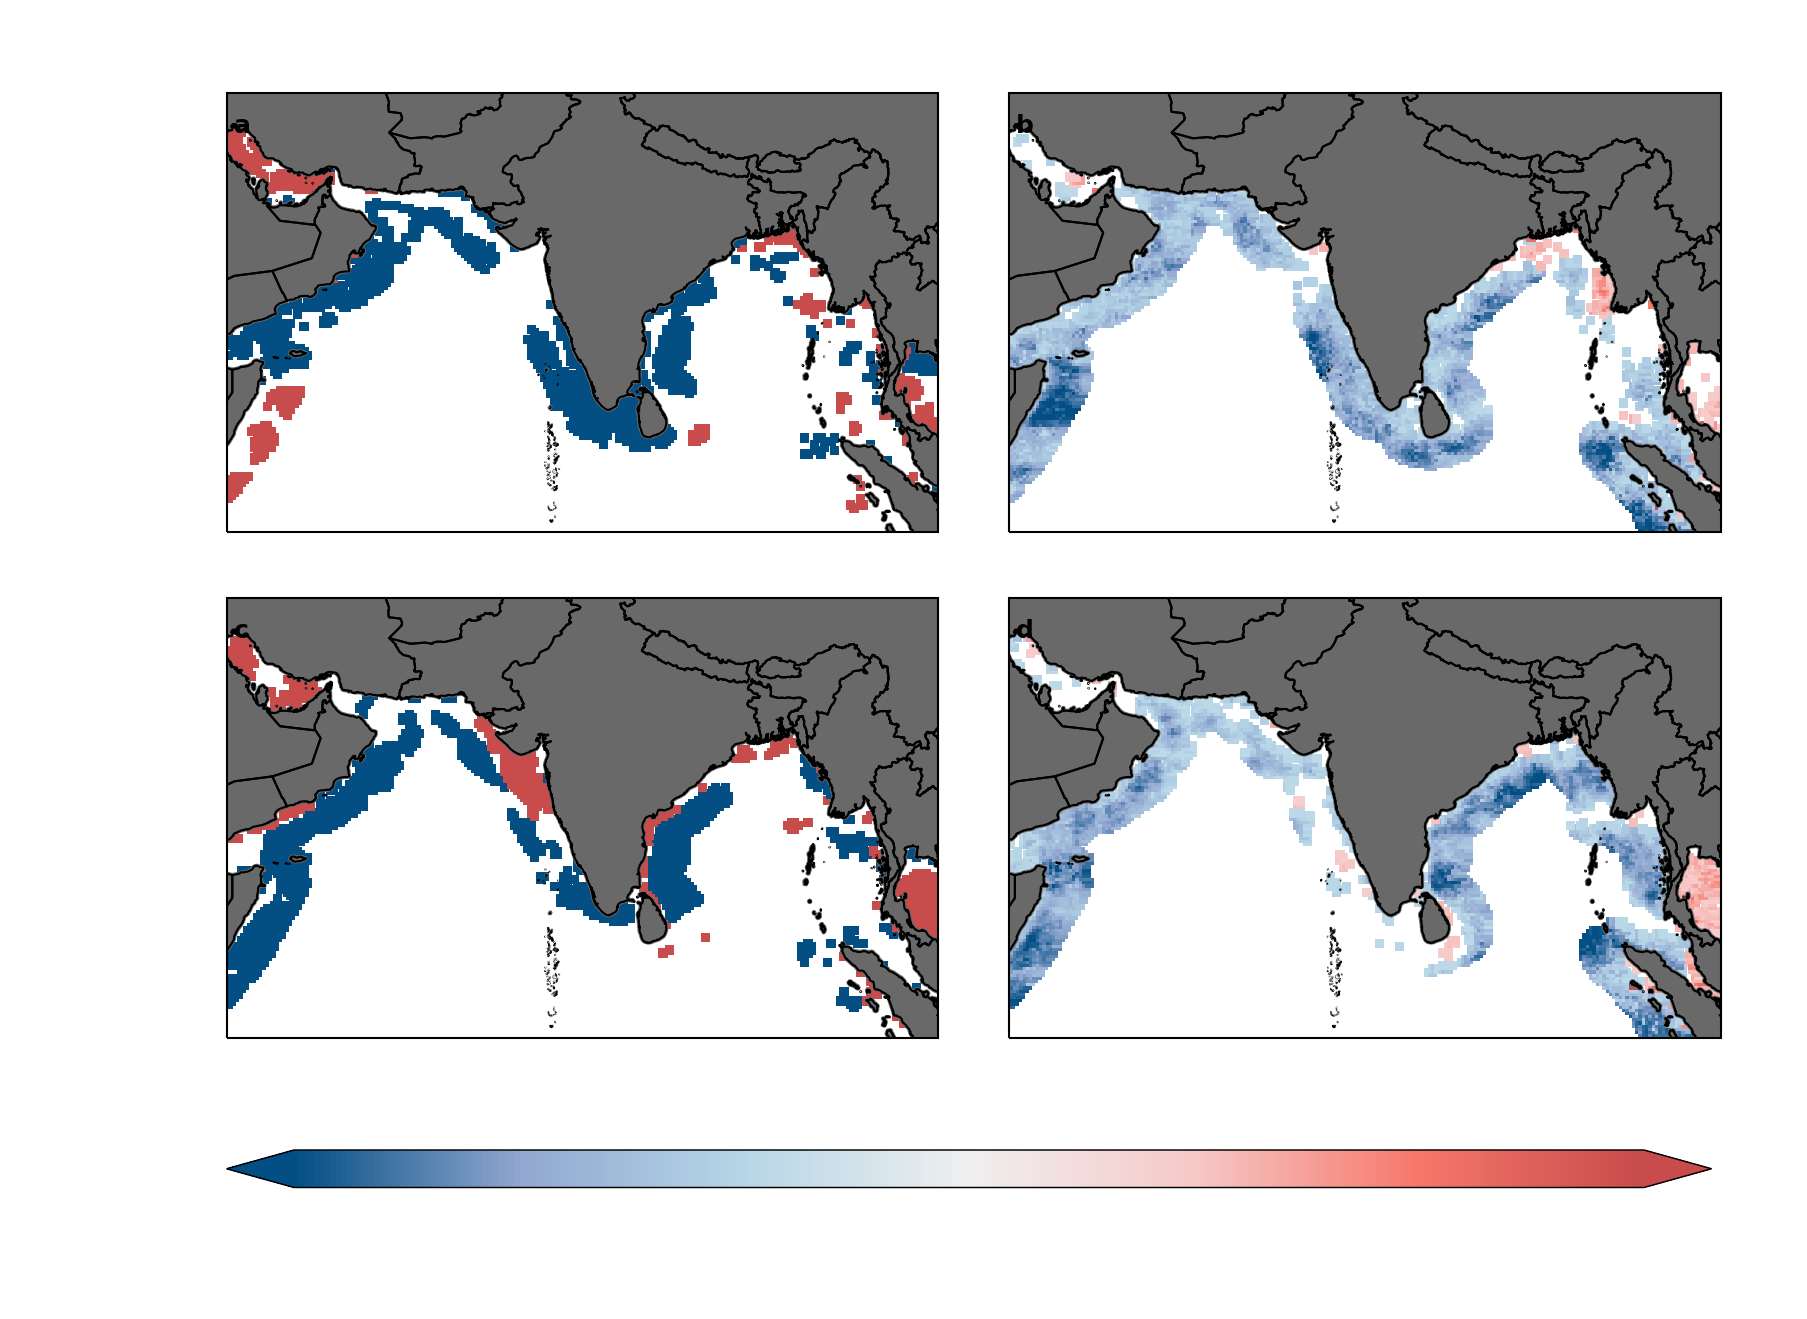

In [33]:
fig = plt.figure(figsize=(6,5),dpi=300)
sz = 5

cmin_corr = -0.6
cmax_corr = 0.6

cmap = get_continuous_cmap(['#000000','#7A378B','#42d4f4','#D3D3D3','#DcDcDc','#F0F0F0'],
                           [0,0.4,0.6,0.8,0.9,1])

cmap2 = get_continuous_cmap(['#034f84','#92a8d1','#b7d7e8','#f0f0f0','#f7cac9','#f7786b','#c94c4c'])

params = {'legend.fontsize': 4,
         'axes.labelsize': 6,
         'axes.titlesize': 6,
         'xtick.labelsize':4,
         'ytick.labelsize':4,
         'axes.linewidth':0.35,
         'xtick.major.width':0,
         'xtick.major.size':1.5,
         'ytick.major.width':0.75,
         'ytick.major.size':1.5}

pylab.rcParams.update(params)

lfsz = 6

xx,yy = np.meshgrid(np.array(ds_CHL.lon),np.array(ds_CHL.lat))
xx = xx.flatten()[mask]
yy = yy.flatten()[mask]


xx_sla,yy_sla = np.meshgrid(np.array(ds_SLA.lon),np.array(ds_SLA.lat))
xx_sla = xx_sla.flatten()[mask_sla]
yy_sla = yy_sla.flatten()[mask_sla]
##############################################################


ax = fig.add_subplot(221,projection= ccrs.PlateCarree())
tmp = R_VALUE_sla[:,:,1].flatten()[mask_sla]
hatch_var = P_VALUE_sla[:,:,1].flatten()[mask_sla]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx_sla[hatch_var <= 0.05],yy_sla[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#                norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
ylabel_map(ax,x = -0.22,label='Summer/Fall', fontsize = 10, color='w')
ax.set_title('Seasonal CHL vs. SLA', fontsize = 12, c='w')
g = add_land(ax, bounds = cm_bounds,countries = True,ccolor = 'k')
g.xlabels_bottom = False
g.xlabel_style = {'size': 8}
g.ylabel_style = {'size': 8}
g.xlabel_style = {'color': 'w'}
g.ylabel_style = {'color': 'w'}
add_letter(ax, 'a', x = 0.01,y=0.91, fontsize = lfsz)

ax = fig.add_subplot(222,projection= ccrs.PlateCarree())
tmp = R_VALUE_sla_ia[:,:,1].flatten()[mask_sla]
hatch_var = P_VALUE_sla_ia[:,:,1].flatten()[mask_sla]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx_sla[hatch_var <= 0.05],yy_sla[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#                norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
g = add_land(ax, bounds = cm_bounds, countries = True,ccolor = 'k')
g.ylabels_left = False
g.xlabels_bottom = False
g.xlabel_style = {'size': 8}
g.ylabel_style = {'size': 8}
g.xlabel_style = {'color': 'w'}
g.ylabel_style = {'color': 'w'}
add_letter(ax, 'b', x = 0.01,y=0.91, fontsize = lfsz)
ax.set_title('Inter. Anomaly CHL vs. SLA', fontsize = 12, c='w')

ax = fig.add_subplot(223,projection= ccrs.PlateCarree())
tmp = R_VALUE_sla[:,:,0].flatten()[mask_sla]
hatch_var = P_VALUE_sla[:,:,0].flatten()[mask_sla]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx_sla[hatch_var <= 0.05],yy_sla[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#               norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
g = add_land(ax, bounds = cm_bounds, countries = True,ccolor = 'k')
g.xlocator = mticker.FixedLocator([54,78,102])
g.xlabel_style = {'size': 8}
g.ylabel_style = {'size': 8}
g.xlabel_style = {'color': 'w'}
g.ylabel_style = {'color': 'w'}
add_letter(ax, 'c', x = 0.01,y=0.91, fontsize = lfsz)
ylabel_map(ax,x = -0.22,label='Winter/Spring', fontsize = 10, color='w')

ax = fig.add_subplot(224,projection= ccrs.PlateCarree())
tmp = R_VALUE_sla_ia[:,:,0].flatten()[mask_sla]
hatch_var = P_VALUE_sla_ia[:,:,0].flatten()[mask_sla]
hatch_mask = hatch_var <= 0.5
# print(np.max(tmp[hatch_var <= 0.05]),np.min(tmp[hatch_var <= 0.05]))
p = ax.scatter(xx_sla[hatch_var <= 0.05],yy_sla[hatch_var <= 0.05],c = tmp[hatch_var <= 0.05],marker='s',s= sz,linewidth=0,
               cmap=cmap2,transform=ccrs.PlateCarree(),vmin=cmin_corr,vmax=cmax_corr)
#               norm=mpl.colors.SymLogNorm(linthresh=0.1, linscale=1,vmin=cmin_corr,vmax=cmax_corr))
g = add_land(ax, bounds = cm_bounds, countries = True,ccolor = 'k')
g.xlocator = mticker.FixedLocator([54,78,102])
g.ylabels_left = False
g.xlabel_style = {'size': 8}
g.ylabel_style = {'size': 8}
g.xlabel_style = {'color': 'w'}
g.ylabel_style = {'color': 'w'}
add_letter(ax, 'd', x = 0.01,y=0.91, fontsize = lfsz)

cbar_ax = fig.add_axes([0.15, 0.15, 0.825, 0.025])
cbar = fig.colorbar(p,cax=cbar_ax, pad=0.04, orientation = 'horizontal', 
                    extend = 'both')
cbar.set_label('Correlation Coefficient', fontsize = 11,c='w')
cbar.ax.tick_params(axis='x', colors='w',labelsize=4.5)

plt.subplots_adjust(wspace = 0.1, hspace = 0.15, bottom = 0.25, left = 0.15, right = 0.98)